In [14]:
import numpy as np
import pandas as pd

file_path = r"C:\Users\paulb\Downloads\processed-global\global\global.tsv"

chunks = []
for chunk in pd.read_csv(file_path, sep='\t', chunksize=1000000):
    # optional preprocessing here
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
df.head()

KeyboardInterrupt: 

In [2]:
print(df.columns.tolist())
print(len(df))

['pdb_fn', 'mutations', 'job_uuid', 'start_time', 'run_time', 'mutate_run_time', 'relax_run_time', 'filter_run_time', 'centroid_run_time', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity', 'filter_total_score', 'buried_all', 'buried_np', 'contact_all', 'contact_buried_core', 'contact_buried_core_boundary', 'degree', 'degree_core', 'degree_core_boundary', 'exposed_hydrophobics', 'exposed_np_AFIMLWVY', 'exposed_polars', 'exposed_total', 'one_core_each', 'pack', 'res_count_all', 'res_count_buried_core', 'res_count_buried_core_boundary', 'res_count_buried_np_core', 'res_count_buried_np_core_boundary', 'ss_contributes_core', 'ss_mis', 'total_hydrophobic', 'total_hydrophobic_AFILMVWY', 'total_sasa', 'two_core_each', 'unsat_hbond', 'centroid_total_score', 'cbeta', 'cenpack', 'env', 'h

In [ ]:
keep = ['pdb_fn', 'mutations', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity', 'filter_total_score', 'buried_all', 'buried_np', 'contact_all', 'contact_buried_core', 'contact_buried_core_boundary', 'degree', 'degree_core', 'degree_core_boundary', 'exposed_hydrophobics', 'exposed_np_AFIMLWVY', 'exposed_polars', 'exposed_total', 'one_core_each', 'pack', 'res_count_all', 'res_count_buried_core', 'res_count_buried_core_boundary', 'res_count_buried_np_core', 'res_count_buried_np_core_boundary', 'ss_contributes_core', 'ss_mis', 'total_hydrophobic', 'total_hydrophobic_AFILMVWY', 'total_sasa', 'two_core_each', 'unsat_hbond', 'centroid_total_score', 'cbeta', 'cenpack', 'env', 'hs_pair', 'linear_chainbreak', 'overlap_chainbreak', 'pair', 'rg', 'rsigma', 'sheet', 'ss_pair', 'vdw']

rosetta = ['pdb_fn', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'yhh_planarity']

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

rosetta_numeric = [c for c in rosetta if c != 'pdb_fn']
df_rosetta = df[rosetta_numeric]

correlation = df_rosetta.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='bwr', center=0)
plt.title("Correlation of rosetta components")
plt.show()

NameError: name 'rosetta' is not defined

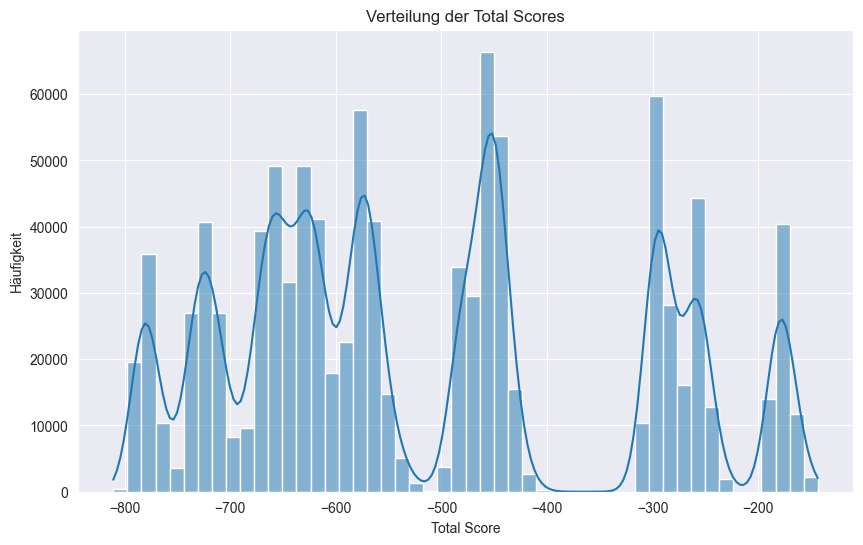

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['total_score'], bins=50, kde=True)
plt.xlabel("Total Score")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Total Scores")
plt.show()

In [ ]:
chunks = []
for chunk in pd.read_csv(file_path, sep='\t', usecols=['pdb_fn'], chunksize=1_000_000):
    chunk['pdb_prefix'] = chunk['pdb_fn'].astype(str).str[:4]
    chunks.append(chunk[['pdb_prefix']])

df_prefix = pd.concat(chunks, ignore_index=True)
print(df_prefix.head())

In [11]:

unique_proteins = df['pdb_prefix'].nunique()
print("Anzahl unterschiedlicher Proteine:", unique_proteins)

unique_proteins = df['pdb_prefix'].unique()
print(unique_proteins)

# Zeilenanzahl pro Protein
counts = df_prefix['pdb_prefix'].value_counts()
print(counts)

Anzahl unterschiedlicher Proteine: 58
['1h2e' '1a6m' '1gbs' '1jo0' '1cjw' '1g9o' '1aoe' '1jo8' '1jfx' '1i5g'
 '1fvg' '1mk0' '1iwd' '1gzc' '1ql0' '1ny1' '1beh' '1htw' '1i58' '1aba'
 '1bdo' '1czn' '1t8k' '1h0p' '1ag6' '1a70' '1jwq' '1ku3' '1nb9' '1nrv'
 '1fqt' '1jl1' '1m8a' '1nps' '1i71' '1brf' '1k7c' '1tqg' '1d1q' '1dlw'
 '1eaz' '1cke' '1kid' '1cc8' '1c9o' '1lpy' '1dsx' '1whi' '1pch' '1c44'
 '1ej0' '1qf9' '2hs1' '1beb' '1ktg' '1c52' '1ej8' '2mhr']
pdb_prefix
1tqg    199159
1t8k    199063
1aoe    198901
1cjw    198825
1i5g    198659
2hs1    198511
1ql0    198453
1qf9    198416
1beh    198394
1i58    198129
1ej0    198069
1a6m    198066
1htw    198004
1dsx    198001
1jo8    197911
1ag6    197825
1jwq    197767
1fvg    197752
1ny1    197741
1h2e    197731
1pch    197674
1jo0    197613
1jfx    197432
1c9o    197363
1gzc    197354
1k7c    197290
1g9o    197134
1a70    197120
1czn    197115
1i71    197106
1aba    197025
1gbs    196950
1nb9    196914
1ku3    196908
1whi    196633
1nps    19661